# Relic Denisty for $\chi\chi\to h_2 h_2$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [4]:
# Read the file with the good DM data
xd2 = pd.read_csv('DM2.csv')
del[xd2['Unnamed: 0']]

In [6]:
#Sum
xd2['BRS'] = xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3+xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3+xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3+xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3+xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3+xd2.BRx1x1h1h1+xd2.BRx1x1h2h2+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww  

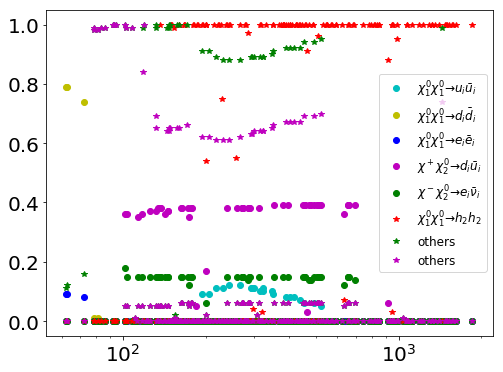

In [7]:
plt.figure(figsize=(8,6))
plt.semilogx(xd2.mChi1, (xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3)/100.,'co',label=r'$\chi_1^0\chi_1^0\to u_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3)/100.,'yo',label=r'$\chi_1^0\chi_1^0\to d_i\bar{d}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3)/100.,'bo',label=r'$\chi_1^0\chi_1^0\to e_i\bar{e}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'mo',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'go',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

plt.semilogx(xd2.mChi1, xd2.BRx1x1h2h2/100.,'r*',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1h1h1+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww)/100.,'g*',label=r'others')
plt.semilogx(xd2.mChi1, (xd2.BRxxww+xd2.BRx2x2ww+xd2.BRx1x1ww+xd2.BRx1x1ZZ)/100.,'m*',label=r'others')
#plt.semilogx(xd2.mChi1, xd2.BRS/100.,'k*',label=r'$\Sigma$')
plt.legend(prop={'size':12},loc='best')
plt.show()

In [62]:
#h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >80, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)> 20)]
h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >90., xd2.mChi1>xd2.mh2)]

In [63]:
h2.sv.max()

1.0699999999999999e-27

In [64]:
h2 = h2.reset_index()
del[h2['index']]

In [65]:
print(xd2.shape[0], h2.shape[0])

284 100


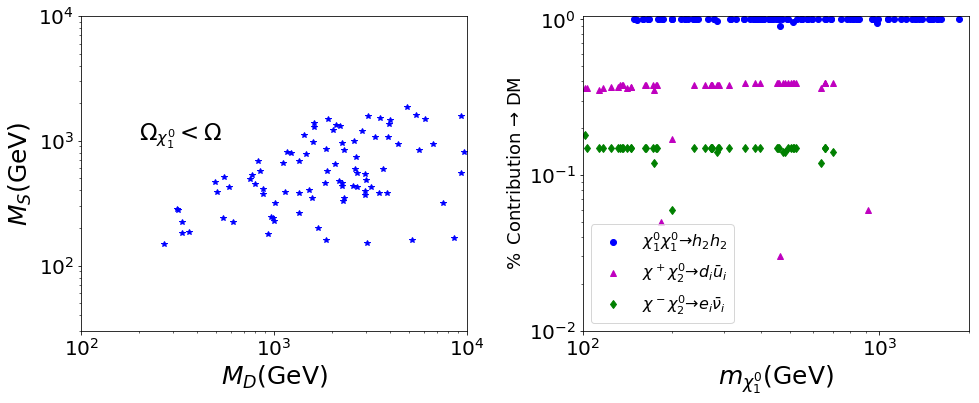

In [103]:
plt.figure(figsize=(14,6))

plt.subplot(121)
#plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',markersize=4,label=r'$\Omega h^2$ + $\nu_\alpha$ ')
#plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label=r'+ DID')
plt.loglog(h2.MDF, h2.vS*h2.YRC/np.sqrt(2),'b*',label=r'')

#point
plt.text(200, 1.0e3, r'$\Omega_{\chi^0_1} < \Omega$', {'color': 'k', 'fontsize': 23})

#plt.grid()
#plt.title('general scan')
#plt.legend(prop={'size':20},loc='upper left')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_S$(GeV)',size=25)
plt.xlim(1e2,10e3)
plt.ylim(3e1,1e4)

plt.subplot(122)

plt.loglog(h2.mChi1, h2.BRx1x1h2h2/100.,'bo',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'m^',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'gd',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

#plt.grid()
plt.legend(prop={'size':16},loc='best')
plt.xlabel(r'$m_{\chi_1^0}$(GeV)',size=25)
plt.ylabel(r'$\%\,$ Contribution $\to$ DM',size=18)
plt.xlim(1e2,2e3)
plt.ylim(0.01,1.05)

plt.tight_layout()
plt.show()

## P-Wave sigma v

\begin{equation}
\sigma v_r \approx \dfrac{h_c^4 (Z^H_{11})^4\sqrt{1-\mu^2}(9-8\mu^2+2\mu^4) }{192 \pi\, m_{\chi}^2 (2-\mu^2)^4} \color{red}{v_r^2} = b \color{red}{v_r^2} \to 
\langle\sigma v_r\rangle \approx \dfrac{h_c^4 (Z^H_{11})^4\sqrt{1-\mu^2}(9-8\mu^2+2\mu^4) }{192 \pi\, m_{\chi}^2 (2-\mu^2)^4} \color{red}{\dfrac{3}{x_f} }
\end{equation}

Conversion factor:
$3\times 10^{-26} cm^2/s \approx 2.54 \times 10^{-9} GeV^{-2}$

In [88]:
def sigmav(hc,ZH,u,m,xf):
    conver = 3.*10**(-26)/(2.54*10**(-9))
    siv = hc**4*ZH**4*np.sqrt(1.-u**2)*(9.-8.*u**2+2.*u**4)/(192.*np.pi*m**2*(2.-u**2)**4)*(3./xf)*conver
    return siv

In [89]:
#Add to the DataFrame
h2['sv_fr_ana'] = sigmav(h2.YRC,h2.ZH11,h2.mh2/h2.mChi1,h2.mChi1,h2.Xf)

In [90]:
h2[['sv','vsigmaeff','sv_fr_ana']][:5]

,sv,vsigmaeff,sv_fr_ana
0,2.900000e-31,3.754000e-26,4.087676e-26
1,2.800000e-31,3.621000e-26,3.846374e-26
2,2.870000e-31,3.749000e-26,4.111729e-26
3,2.770000e-31,3.596000e-26,3.909239e-26
4,1.860000e-31,3.985000e-26,2.769158e-26


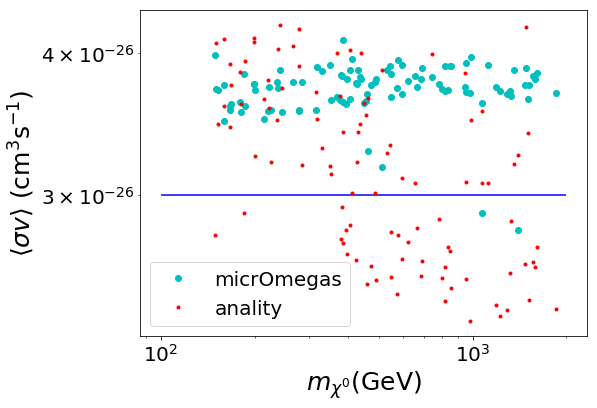

In [91]:
plt.figure(figsize=(8,6))

plt.loglog(h2.mChi1 , h2.vsigmaeff, 'co',label=r'micrOmegas')
plt.loglog(h2.mChi1 , h2.sv_fr_ana, 'r.',label=r'anality')

plt.hlines(3.e-26,1e2,2e3, 'b')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend()

plt.show()

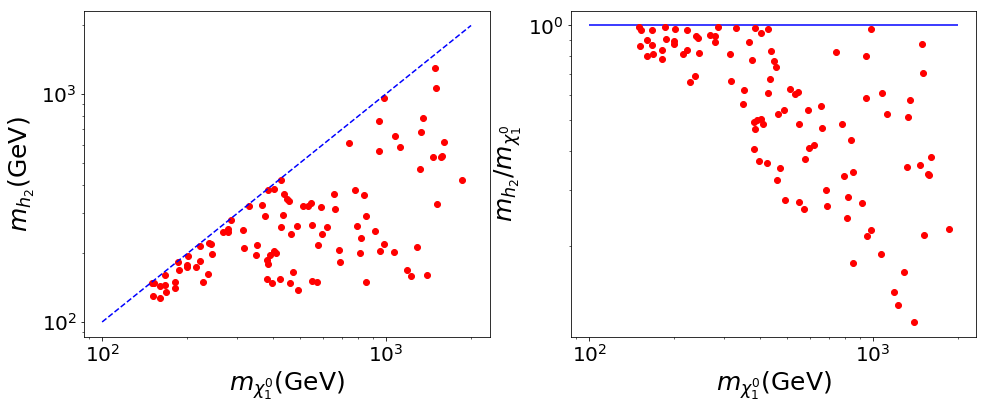

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.loglog(h2.mChi1, h2.mh2, 'ro')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$m_{h_2}$(GeV)',size=25)

a = np.linspace(100,2000,10)
plt.plot(a,a,'b--')

plt.subplot(122)
plt.loglog(h2.mChi1, h2.mh2/h2.mChi1, 'ro')
plt.hlines(1,100,2000,'b')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$m_{h_2}/m_{\chi^0_1}$',size=25)

plt.show()

Ok. Near to $3\times 10^{-26}$ WIMP miracle

# Relic Density $\Omega h^2$

\begin{equation}
\Omega h^2 = \dfrac{0.877\times 10^{-10}x_f}{\sqrt{g^{*}}}\dfrac{1}{\langle \sigma v_r\rangle}\to
\dfrac{0.877\times 10^{-10}x_f}{\sqrt{g^{*}}}\dfrac{1}{\left(a+\dfrac{3b}{x_f}+\cdots\right)}
\end{equation}

In [92]:
conver = 3.*10**(-26)/(2.54*10**(-9))

In [113]:
h2['Omega_ana'] = 0.877*1.0e-10*h2.Xf/np.sqrt(90.)*1./(h2.sv_fr_ana/conver)

In [114]:
#h2['Omega_ana'] = 0.877*1.0e-10*h2.Xf/np.sqrt(90.)*1./(h2.vsigmaeff/conver)

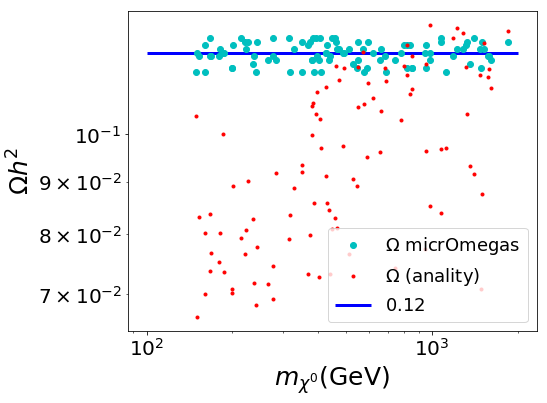

In [115]:
plt.figure(figsize=(8,6))

plt.hlines(0.12, 1e2, 2e3, 'b',lw=3,label=r'$0.12$')
plt.loglog(h2.mChi1, h2.Omega, 'co',label=r'$\Omega$ micrOmegas')
plt.loglog(h2.mChi1, h2.Omega_ana, 'r.',label=r'$\Omega$ (anality)')
plt.legend(prop={'size':18},loc='best')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)

#plt.ylim(0.05, 0.2)

plt.tight_layout()
plt.savefig('plots/xxtoh2h2-OMEGA.pdf')
#plt.show()